# Computing $\pi$ with Interpolation

In [9]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

Here's the half-circle function:

In [14]:
def f(x):
    return np.sqrt(1-x**2)

We'll only look at it on $[0,1]$:

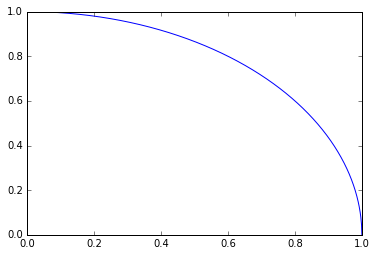

In [15]:
x_plot = np.linspace(0, 1, 1000)
plt.plot(x_plot, f(x_plot))

In [84]:
degree = 4

nodes = np.linspace(0, 1, degree+1)
nodes

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

Now build the Vandermonde matrix:

In [85]:
V = np.array([
    nodes**i
    for i in range(degree+1)
]).T

And find the coefficients as `coeffs`:

In [86]:
coeffs = la.solve(V, f(nodes))

Now evaluate the interpolant at `x_plot`

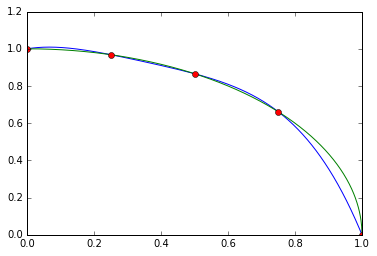

In [87]:
interp_plot = 0*x_plot
for i in range(degree+1):
    interp_plot += coeffs[i] * x_plot**i
    
plt.plot(x_plot, interp_plot)
plt.plot(x_plot, f(x_plot))
plt.plot(nodes, f(nodes), "o")

Now integrate the interpolant:

In [88]:
# clear
integral = 0
for i in range(degree+1):
    integral += coeffs[i] * 1/(i+1) * (1**(i+1) - 0**(i+1))

In [89]:
my_pi = 4*integral
my_pi

3.0907636490484132